# Major Factors for Loan Evaluation and their Impacts
## Ayush Ayyangar

## Investigation Overview

In this investigation of the Prosper Loan Data I wanted to examine the factors that go into giving out loans and also the status of the loan payments based on the same factors. A secondary analysis also involved in exlporing how the borrower rates relate to the estimated profit for the bank. 

## Dataset Overview

There are  total of 113937 loans with 81 features for each in the dataset.  Most of the variables in the dataset are numeric and floats as they deal with loan amounts, principal, interest and other metrics related to Prosper's yield and estimated returns. The dataset  contains the entire risk profile for the loan, the borrower. Some of the data for unverified income where stated income was less than $1 was removed for uniformity and accuracy.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
df_copy = df.copy()

(113937, 81)


In [21]:
df['LoanStatus']= df['LoanStatus'].astype('category')
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
ordinal_var = { 'CreditScoreRangeUpper': np.arange(19.0,900.0),
                'CreditScoreRangeLower': np.arange(0.0,881.0),
                'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                'ProsperScore': [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0],
                'ProsperRating (numeric)':[1.0,2.0,3.0,4.0,5.0,6.0,7.0]
                }
for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var[var])
    df[var] = df[var].astype(ordered_var)

## Distribution of Loan Amounts

> Distribution of the original loan amounts in the dataset, the higher distribution of loans is towards the lower amounts with some additional amounts at 10000 and 15000 but the maximum number of loans are at $5000

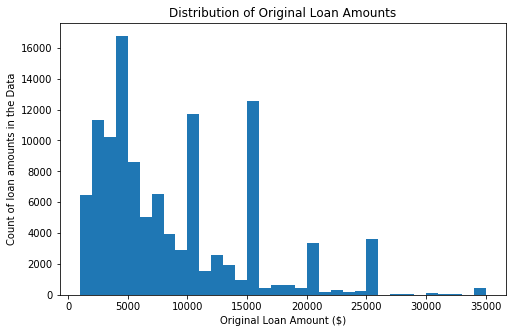

In [9]:
plt.figure(figsize=[8, 5])
bin_s = np.arange(df.LoanOriginalAmount.min(),df.LoanOriginalAmount.max()+1000,1000)
plt.hist(data =df, x='LoanOriginalAmount', bins = bin_s)
plt.title('Distribution of Original Loan Amounts')
plt.ylabel('Count of loan amounts in the Data')
plt.xlabel('Original Loan Amount ($)')
plt.show()

## Distribution of Loans in the Dataset based on Prosper Score

> Prosper Score is a key score used in determining the risk of a loan and the risk profile of the buyer. It is important to understand the frequency of  loans per Prosper Score to analyze the data better. It is observed that majority of the loans are between 4 to 9 Prosper Score.

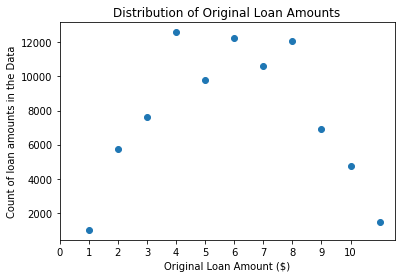

In [10]:
df_Score = df.groupby('ProsperScore').ProsperScore.count()
df_Score = df_Score.reset_index(name = 'Total')
plt.scatter(data=df_Score,x= 'ProsperScore', y= 'Total')
plt.xticks(np.arange(0,11,1))
plt.title('Distribution of Original Loan Amounts')
plt.ylabel('Count of loan amounts in the Data')
plt.xlabel('Original Loan Amount ($)')
plt.show()

## Lender Yield and Original Loan Amount based on Risk Ratings

1. Lender Yields are higher for lower Prosper Score and lower Prosper numeric rating, this is due to the higher risk profile for the borrower.
2. Original Loan amounts are more distributed for the lower risk profile borrowers and more concentrated to the lower amounts. This lends credence to the fact that higher risk borrowers may only get approved for lower loan amounts.

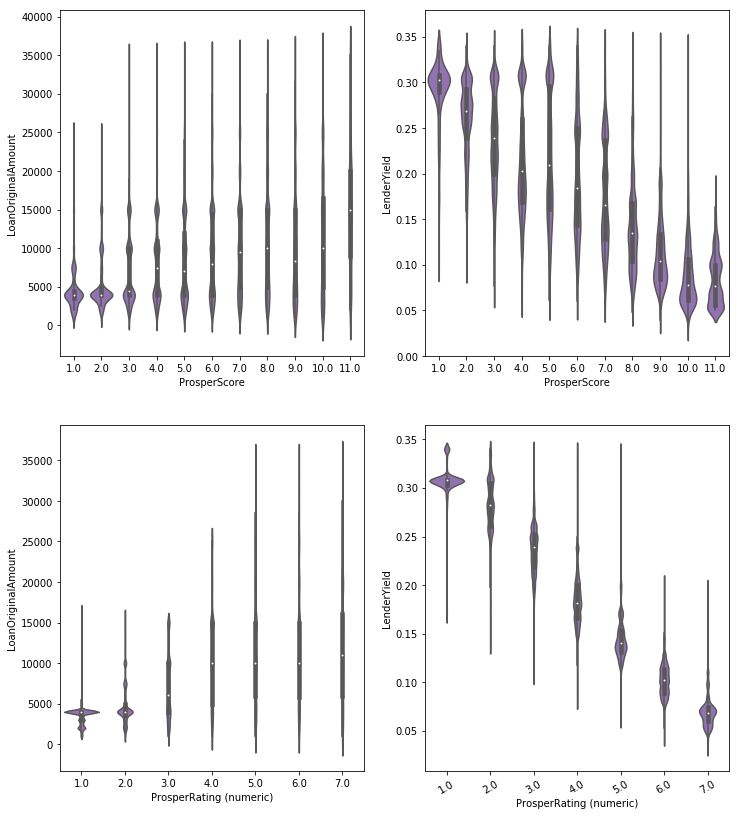

In [15]:
#Simulating plots of categorical vs numeric fields
numeric_vars = ['LoanOriginalAmount','LoanCurrentDaysDelinquent',\
                'EstimatedReturn','LP_NetPrincipalLoss','BorrowerAPR', 'AvailableBankcardCredit']
categorical_vars = ['ProsperScore', 'ProsperRating (numeric)', 'LoanStatus']
sample = np.random.choice(df.shape[0],2000, replace = False)
df_samp = df.loc[sample,:]

base = sb.color_palette()[4]

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=[12,14])
plt.xticks(rotation= 30)
categoric_vars = ['ProsperScore', 'ProsperRating (numeric)']
num = ['LoanOriginalAmount','LenderYield']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df, x =var, y ='LoanOriginalAmount', color = base, ax= ax[i,0])
    
    sb.violinplot(data =df,x =var, y ='LenderYield', color = base, ax= ax[i,1] )

plt.show()

## Percentage of Loans that are late per Prosper Score

> Prosper Score is a reliable indicator of the risk profile for a borrower. This is proved by the fact that Prosper Score is directly proportional to the percentage of loans that are late. Higher score levels have 0.1% to 1% of loans late whereas the lower scores have late payments of up to 4%

In [23]:
df_counts = df_copy.groupby(['ProsperScore', 'LoanStatus']).size()
df_counts = df_counts.reset_index(name = 'count')
df_counts = df_counts.pivot(index='ProsperScore',columns = 'LoanStatus',values = 'count')
df_counts.fillna(0,inplace = True)

In [26]:
df_counts['Late_Loans'] = df_counts['Past Due (1-15 days)']+ df_counts['Past Due (16-30 days)']+ df_counts['Past Due (31-60 days)']+\
                          df_counts['Past Due (61-90 days)'] + df_counts['Past Due (91-120 days)']+ df_counts['Past Due (>120 days)']                       
#Calculate Percentage of Bad Loans
df_Late = df_counts.drop(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',\
                          'Past Due (>120 days)'], axis =1)
df_Late['PercentageBadLoans']= df_Late['Late_Loans']/(df_Late.Chargedoff+df_Late.Completed+df_Late.Current+df_Late.Defaulted+df_Late.FinalPaymentInProgress)*100
df_Percentage = df_Late.copy()
df_Percentage.drop(['Chargedoff','Completed','Current','Defaulted','FinalPaymentInProgress','Late_Loans'], inplace = True, axis =1)

Text(0.5,1,'Percentage of Loans that are late based on Prosper Score')

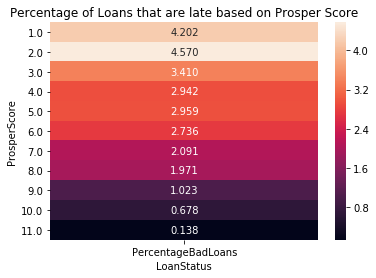

In [28]:
sb.heatmap(df_Percentage, annot= True, fmt= '.3f')
plt.title("Percentage of Loans that are late based on Prosper Score")

## Borrower APR and Loan Status distribution across the Risk Profile
1. The focus here is clustered around the maximum loans lended between Prosper Score of 4-9 so as to avoid any dilution of the results
2. The distribution of Borrower APR against Prosper Score shows that the Borrower APR reduces with higher Prosper score i.e with the lower risk profile.
3. Loan Status also follow the trend of the risk profile with higher Prosper Score and lower risk values leading to lower defaults and late payments on the loans.
4. Loans later than 120 days spike for Prosper Score of 6 but this is due to the fact that the maximum loans are given at Prosper Score 4 and 6.

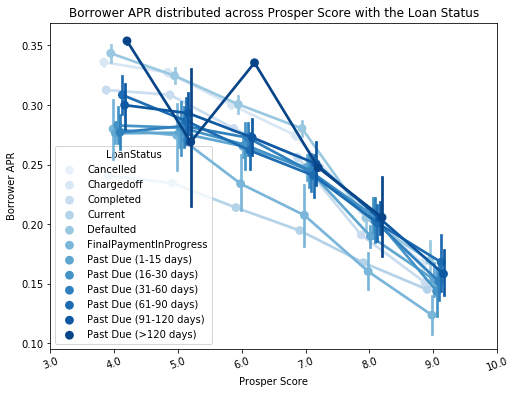

In [36]:
df_midrange = (df['ProsperScore'] >= 4) & (df['ProsperScore'] <= 9)
df_midPS = df.loc[df_midrange,:]
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_midPS, x = 'ProsperScore', y = 'BorrowerAPR', hue ='LoanStatus',palette = 'Blues', dodge = 0.4)
plt.title('Borrower APR distributed across Prosper Score with the Loan Status')
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Score')
ax.set_yticklabels([],minor = True, loc = 1)
plt.xticks(rotation =20)
plt.xlim(2,9)
plt.show();

## Loss in Principal distribution across the Prosper Ratings

> Lower Prosper alpha and numeric rating values correspond to a higher loss in gross principal for Prosper. The risk profile for Prosper is well developed with the 3 Prosper rating and Prosper score giving the lender a clear idea of the risk the bank is taking in their lending profile.

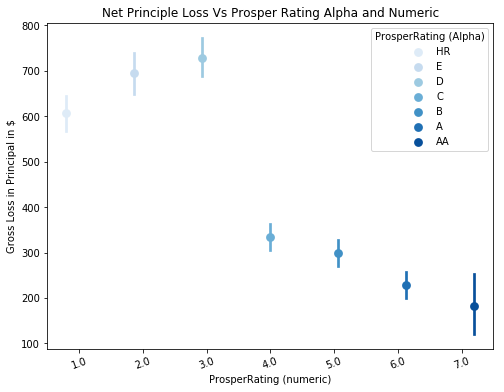

In [34]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_midPS, x = 'ProsperRating (numeric)', y = 'LP_GrossPrincipalLoss',\
                  hue ='ProsperRating (Alpha)',linestyels = '',palette = 'Blues', dodge = 0.4)
plt.title('Net Principal Loss Vs Prosper Rating (Alpha and Numeric)')
plt.ylabel('Gross Loss in Principal in $')
ax.set_yticklabels([],minor = True, loc = 1)
plt.xticks(rotation =20)
plt.show();